In [22]:
import matplotlib.pyplot as plt
import pandas as pd
import math
from datetime import datetime

In [49]:
df_boat1_data = pd.read_csv('data/firstBoatData.csv')
df_boat1_sim = pd.read_csv('results/firstBoatSim.csv')
df_boat2_data = pd.read_csv('data/secondBoatData.csv')
df_boat2_sim = pd.read_csv('results/secondBoatSim.csv')

In [11]:
# calculate the error from geo coordinates
EARTH_RADIUS_METERS = 6378137.0

def error_in_distance(lat1, lon1, lat2, lon2):
    d_lat = math.radians(lat2 - lat1)
    d_lon = math.radians(lon2 - lon1)
    a = (math.sin(d_lat / 2) * math.sin(d_lat / 2) +
         math.cos(math.radians(lat1)) * math.cos(math.radians(lat2)) *
         math.sin(d_lon / 2) * math.sin(d_lon / 2))
    c = 2 * math.atan2(math.sqrt(a), math.sqrt(1 - a))
    d = EARTH_RADIUS_METERS * c  # Distance in meters
    return d


In [24]:
def date_to_seconds(date_str):
    date_format = "%Y-%m-%d %H:%M:%S"
    dt = datetime.strptime(date_str, date_format)
    return int(dt.timestamp())

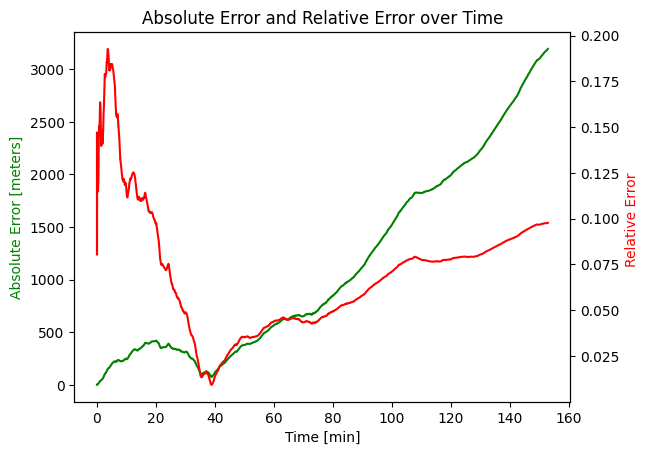

In [48]:
errorPerTime = pd.DataFrame(columns=['Time', 'AbsError', 'RelError'])
abs_error = []
for i in range(len(df_boat1_data)):
    abs_error.append(error_in_distance(df_boat1_data['LAT'][i], df_boat1_data['LON'][i], df_boat1_sim['LAT'][i], df_boat1_sim['LON'][i]))
errorPerTime['AbsError'] = abs_error

relative_error = []
for i in range(len(df_boat1_data)):
    relative_error.append(abs_error[i] / df_boat1_data['distance'][i])
errorPerTime['RelError'] = relative_error

time = []
for i in range(len(df_boat1_data)):
    time.append(date_to_seconds(df_boat1_data['BaseDateTime'][i]))
errorPerTime['Time'] = time
errorPerTime['Time'] = errorPerTime['Time'] / 60
errorPerTime['Time'] = errorPerTime['Time'] - errorPerTime['Time'][0]

fig, ax1 = plt.subplots()
ax2 = ax1.twinx()
ax1.plot(errorPerTime['Time'], errorPerTime['AbsError'], 'g-')
ax2.plot(errorPerTime['Time'], errorPerTime['RelError'], 'r-')
ax1.set_xlabel('Time [min]')
ax1.set_ylabel('Absolute Error [meters]', color='g')
ax2.set_ylabel('Relative Error ', color='r')
plt.title('Absolute Error and Relative Error over Time')
plt.show()


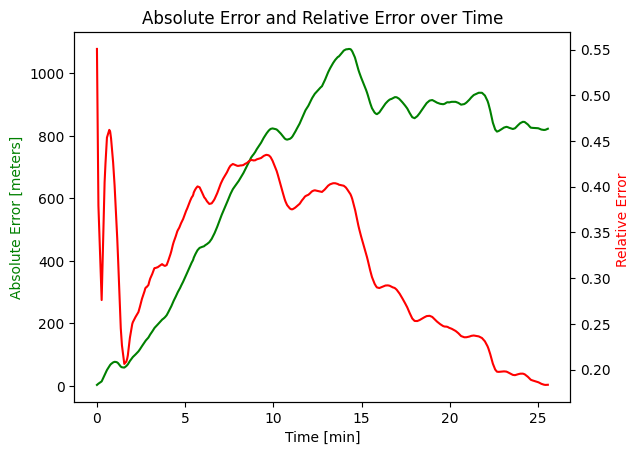

In [50]:
errorPerTime = pd.DataFrame(columns=['Time', 'AbsError', 'RelError'])
abs_error = []
for i in range(len(df_boat2_data)):
    abs_error.append(error_in_distance(df_boat2_data['LAT'][i], df_boat2_data['LON'][i], df_boat2_sim['LAT'][i], df_boat2_sim['LON'][i]))
errorPerTime['AbsError'] = abs_error

relative_error = []
for i in range(len(df_boat2_data)):
    relative_error.append(abs_error[i] / df_boat2_data['distance'][i])
errorPerTime['RelError'] = relative_error

time = []
for i in range(len(df_boat2_data)):
    time.append(date_to_seconds(df_boat2_data['BaseDateTime'][i]))
errorPerTime['Time'] = time
errorPerTime['Time'] = errorPerTime['Time'] / 60
errorPerTime['Time'] = errorPerTime['Time'] - errorPerTime['Time'][0]

fig, ax1 = plt.subplots()
ax2 = ax1.twinx()
ax1.plot(errorPerTime['Time'], errorPerTime['AbsError'], 'g-')
ax2.plot(errorPerTime['Time'], errorPerTime['RelError'], 'r-')
ax1.set_xlabel('Time [min]')
ax1.set_ylabel('Absolute Error [meters]', color='g')
ax2.set_ylabel('Relative Error ', color='r')
plt.title('Absolute Error and Relative Error over Time')
plt.show()
